In [118]:
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
import random

In [119]:
# def get_edge_list(file_name):
#     with open(file_name) as ifs:
#         lines = ifs.readlines()
#         edge_list = map(lambda line: map(int, line.strip().split()), filter(lambda ele: '#' not in ele, lines))
#     return edge_list

def get_edge_list(file_name):
    # Open the file and read its contents
    with open(file_name) as file:
        lines = file.readlines()

    # Remove lines that are comments (start with "#")
    lines = [line for line in lines if '#' not in line]

    # Convert each line to a pair of integers
    edge_list = []
    for line in lines:
        edge = tuple(map(int, line.strip().split()))
        edge_list.append(edge)
    
    return edge_list

def get_undirected_graph_info(file_name):
    my_edge_list = get_edge_list(file_name)
    undirected_graph = nx.Graph()
    undirected_graph.add_edges_from(my_edge_list)
    file_info = file_name.split(os.sep)[-1].split('_')[0]
    str_list = [file_info, 'nodes num:' + str(undirected_graph.number_of_nodes()), 'edges num:'
                + str(undirected_graph.number_of_edges())]
    print (' | '.join(str_list))


def get_dir_info(dir_name):
    my_walk = os.walk(dir_name)
    my_root, sub_root_list, file_list = list(my_walk)[0]
    path_list = map(lambda ele: my_root + os.sep + ele, file_list)
    for my_path in path_list:
        get_undirected_graph_info(my_path)


In [120]:
get_undirected_graph_info('test.txt')

test.txt | nodes num:9 | edges num:14


In [121]:
edgeList = get_edge_list('test.txt')

In [122]:
print(edgeList)

[(1, 2), (1, 3), (1, 5), (2, 1), (2, 4), (2, 3), (3, 2), (3, 4), (3, 1), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7), (5, 1), (5, 4), (6, 4), (6, 7), (6, 8), (6, 9), (7, 4), (7, 6), (7, 8), (8, 7), (8, 6), (8, 9)]


In [123]:
undirected_graph = nx.Graph()
undirected_graph.add_edges_from(edgeList)

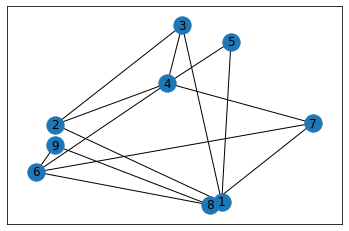

In [205]:

nx.draw_networkx(undirected_graph,pos=nx.random_layout(undirected_graph))

In [175]:
random.choice (list(undirected_graph.edges(1)))
undirected_graph.edges((1,2))


EdgeDataView([(1, 2), (1, 3), (1, 5), (2, 4), (2, 3)])

In [126]:
graphEdge = undirected_graph.edges()
graphNode = undirected_graph.nodes()

In [127]:
number_of_edges=len(graphEdge)

In [160]:
initialGene= np.full(number_of_edges, -1)

In [215]:
locus = [i for i in range(1,number_of_edges+1)]
locus

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [129]:
len(initialGene)

14

In [234]:
labledEdge = {t: i+1 for i, t in enumerate(graphEdge)}
labledEdge

{(1, 2): 1,
 (1, 3): 2,
 (1, 5): 3,
 (2, 4): 4,
 (2, 3): 5,
 (3, 4): 6,
 (5, 4): 7,
 (4, 6): 8,
 (4, 7): 9,
 (6, 7): 10,
 (6, 8): 11,
 (6, 9): 12,
 (7, 8): 13,
 (8, 9): 14}

In [206]:
def getEdgeLabel(labledEdge,edge):
    try:
      return labledEdge[edge]
    except:
      try:
        return labledEdge[(edge[1],edge[0])]
      except:
        print('NO KEY FOUND')
    

In [222]:
def getEdgeValue(labledEdge,value):
   return next((k for k, v in labledEdge.items() if v == value), None)

getEdgeValue(labledEdge,5)

(2, 3)

In [219]:
#make initial communities
prevNode : tuple 
gene = []
for  edge,l in labledEdge.items():
    connectedEdges = list(undirected_graph.edges(edge))
    geneValue = getEdgeLabel(labledEdge,random.choice(connectedEdges))


    if(geneValue != None):
        gene.append(geneValue)

print(locus)
print(gene)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[3, 6, 1, 8, 1, 8, 6, 7, 7, 10, 10, 8, 10, 13]


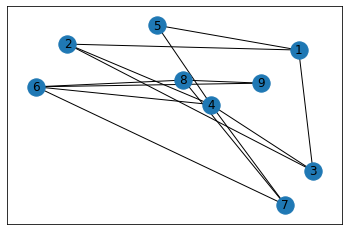

In [217]:
nx.draw_networkx(undirected_graph,pos=nx.random_layout(undirected_graph))

In [220]:

print(locus)
print(gene)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[3, 6, 1, 8, 1, 8, 6, 7, 7, 10, 10, 8, 10, 13]


In [243]:
#finished but not tested with real gene
def calculateFitness(communities: list,labledEdge):
    D = 0
    E = len(labledEdge)
    for i in communities:
        community = nx.Graph()
        community.add_edges_from([getEdgeValue(labledEdge, j) for j in i])
        mc = community.number_of_edges()
        nc = community.number_of_nodes()
        D += mc * ((mc - (nc-1)) / (((nc-2)*(nc-1))))

    return 2*D/E